<a href="https://colab.research.google.com/github/S-tej/ML-DL-Projects/blob/main/MLprojects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sonar Rock vs Mine prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and pre-processing

In [ ]:
sonar_df=pd.read_csv('/content/drive/MyDrive/datasets/sonar data.csv',header=None)

In [ ]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
sonar_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [ ]:
sonar_df.shape

(208, 61)

In [ ]:
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_df.value_counts()

0       1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      33      34      35      36      37      38      39      40      41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60
0.0015  0.0186  0.0289  0.0195  0.0515  0.0817  0.1005  0.0124  0.1168  0.1476  0.2118  0.2575  0.2354  0.1334  0.0092  0.1951  0.3685  0.4646  0.5418  0.6260  0.7420  0.8257  0.8609  0.8400  0.8949  0.9945  1.0000  0.9649  0.8747  0.6257  0.2184  0.2945  0.3645  0.5012  0.7843  0.9361  0.8195  0.6207  0.4513  0.3004  0.2674  0.2241  0.3141  0.3693  0.2986  0.2226  0.0849  0.0359  0.0289  0.0122  0.0045  0.0108  0.0075  0.0089  0.0036  0.0029  0.0013  0.0010  0.0032  0.0047  M     1
0.0025  0.0309  0.0171  0.022

In [ ]:
sonar_df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [ ]:
sonar_df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
X=sonar_df.drop(columns=60,axis=1)
Y=sonar_df[60]

In [ ]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [ ]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


Train and test the data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

Model Training --> Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Acurracy on training data : ',training_data_accuracy)

Acurracy on training data :  0.8342245989304813


In [ ]:
#accuracy on testing data
X_test_pedict=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_pedict,Y_test)

In [ ]:
print("Accuracy on testing data : ",testing_data_accuracy)

Accuracy on testing data :  0.7619047619047619


Making a Predictive system

In [ ]:
input_data=(0.1021,0.0830,0.0577,0.0627,0.0635,0.1328,0.0988,0.1787,0.1199,0.1369,0.2509,0.2631,0.2796,0.2977,0.3823,0.3129,0.3956,0.2093,0.3218,0.3345,0.3184,0.2887,0.3610,0.2566,0.4106,0.4591,0.4722,0.7278,0.7591,0.6579,0.7514,0.6666,0.4903,0.5962,0.6552,0.4014,0.1188,0.3245,0.3107,0.1354,0.5109,0.7988,0.7517,0.5508,0.5858,0.7292,0.5522,0.3339,0.1608,0.0475,0.1004,0.0709,0.0317,0.0309,0.0252,0.0087,0.0177,0.0214,0.0227,0.0106)

#changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
   print("ROCK")
else:
   print("MINE")

['M']
MINE


# Diabetes prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and analysis

In [ ]:
diabetes_df=pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0--> Non DIabetic

In [ ]:
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X=diabetes_df.drop(columns='Outcome',axis=1)
Y=diabetes_df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
Y=diabetes_df['Outcome']

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
#Accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy of training data : ',training_data_accuracy)

Accuracy of training data :  0.7833876221498371


In [ ]:
#Accuracy for test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy of test data : ',test_data_accuracy)

Accuracy of test data :  0.7727272727272727


Predictive function

In [ ]:
input_data=(1,85,66,29,0,26.6,0.351,31)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#stanardize the data
# stand_data = scaler.transform(input_data_reshaped)
# print(stand_data)

#prediction
prediction=classifier.predict(input_data_reshaped)
# print(prediction)

if prediction[0]==0 :
  print('Non Diabetic')
else :
  print('Diabetic')

Non Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename='diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('diabetes_model.sav','rb'))

In [ ]:
input_data=(1,85,66,29,0,26.6,0.351,31)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#stanardize the data
# stand_data = scaler.transform(input_data_reshaped)
# print(stand_data)

#prediction
prediction=loaded_model.predict(input_data_reshaped)
# print(prediction)

if prediction[0]==0 :
  print('Non Diabetic')
else :
  print('Diabetic')

Non Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
for col in X.columns:
  print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


#Spam mail detection with python

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

Data collection and preprocessing

In [ ]:
mail_df=pd.read_csv('/content/drive/MyDrive/datasets/mail_data.csv')

In [ ]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_df.shape

(5572, 2)

In [ ]:
mail_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
mail_df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
mail_df.groupby('Category')

In [ ]:
mail_df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
#Replace the null values with null string
mail_df=mail_df.where((pd.notnull(mail_df)),'')

In [ ]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Label Encoding

In [ ]:
#Lets label spam mail --> 0 and ham mail --> 1
mail_df.loc[mail_df['Category']=='spam','Category']=0
mail_df.loc[mail_df['Category']=='ham','Category']=1

In [ ]:
mail_df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Seperating the data as texts and labels
X=mail_df['Message']
Y=mail_df['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2,stratify=Y,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(5572,) (1114,) (4458,)


Feature Extraction

In [ ]:
#transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_fratures=feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


In [ ]:
print(X_train_features)

  (0, 1873)	0.43388095534364113
  (0, 351)	0.4073477393651782
  (0, 914)	0.3253682305290181
  (0, 511)	0.4073477393651782
  (0, 2105)	0.45270657167622735
  (0, 1736)	0.3065426141964318
  (0, 805)	0.2740562994412588
  (1, 2583)	0.5192203971051348
  (1, 987)	0.5010131874509486
  (1, 3104)	0.6923842612525408
  (2, 2216)	0.7126403426739738
  (2, 2949)	0.4140905386652737
  (2, 852)	0.5662797610558095
  (3, 1492)	0.6571368074526253
  (3, 1038)	0.47767764666232615
  (3, 1407)	0.2793923500923479
  (3, 1847)	0.2781016855259655
  (3, 1384)	0.2768347042195901
  (3, 942)	0.32856840372631263
  (4, 3019)	0.5060617476675318
  (4, 3323)	0.5287750783109704
  (4, 856)	0.6813944702629386
  (5, 1963)	0.38631143071107693
  (5, 692)	0.44155789454935457
  (5, 2264)	0.44155789454935457
  :	:
  (1110, 935)	0.3033791925301995
  (1110, 2934)	0.2958643437609112
  (1110, 1407)	0.27338541233296537
  (1110, 1847)	0.2721224970650728
  (1111, 560)	0.6430444093401715
  (1111, 3234)	0.5263068452254224
  (1111, 1775)	0.4

In [ ]:
print(Y_train)

2076    1
1005    1
329     1
621     1
1320    1
       ..
3305    1
2338    1
1899    1
316     1
1134    1
Name: Category, Length: 1114, dtype: int64


Training the model

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluate the trained model

In [ ]:
#predict the accuracy of training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_triningdata=accuracy_score(Y_train,prediction_on_training_data)
print("Accuracy of training data : ",accuracy_on_triningdata)

Accuracy of training data :  0.9057450628366248


In [ ]:
#predict the accuracy of test data
prediction_on_test_data=model.predict(X_test_fratures)
accuracy_on_testdata=accuracy_score(Y_test,prediction_on_test_data)
print("Accuracy of test data : ",accuracy_on_testdata)

Accuracy of test data :  0.9069089277703006


Building a predictive system

In [ ]:
input_data=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
#convert text to feature vectors
input_data_features=feature_extraction.transform(input_data)

#making prediction

prediction=model.predict(input_data_features)
print(prediction)

if prediction[0]==0 :
  print('It is a spam mail')
else :
  print('It is a ham mail')

[1]
It is a ham mail


#Heart disease prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
heart_df=pd.read_csv('/content/drive/MyDrive/datasets/heart_disease_data.csv')

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_df.shape

(303, 14)

In [ ]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
heart_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1--> defective heart

0--> Healthy heart

Splitting target and features

In [ ]:
X=heart_df.drop(columns='target',axis=1)
Y=heart_df['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting into train and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Model train

Logistic regression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evaluation

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of training data : ',training_data_accuracy)

Accuracy score of training data :  0.8512396694214877


In [ ]:
#For test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.819672131147541


Building the predictive system

In [ ]:
input_data=(62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has a heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename='heart_disease_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('heart_disease_model.sav','rb'))

In [ ]:
input_data=(62,0,0,140,268,0,0,160,0,3.6,0,2,2)
input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has a heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
for col in X.columns:
  print(col)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


#House price prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
house_df=pd.read_csv('/content/drive/MyDrive/datasets/BostonHousing.csv')

In [ ]:
house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
house_df.shape

(506, 14)

In [ ]:
house_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
house_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Understanding the coorelation between the various features in the dataset

In [ ]:
correlation=house_df.corr()

In [ ]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: >

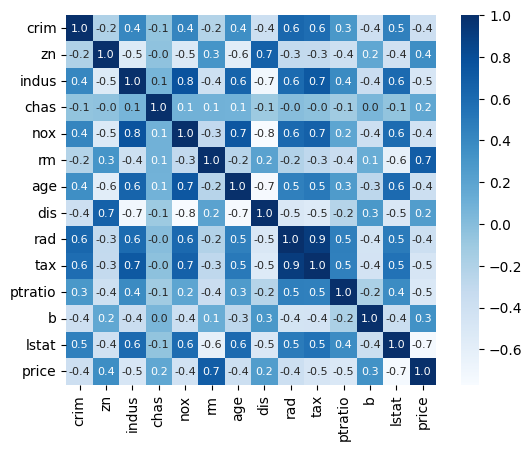

In [ ]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting data into test and train

In [ ]:
X=house_df.drop(['price'],axis=1)
Y=house_df['price']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


**Model tarining**



XGBoost Regressor

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [ ]:
training_data_prediction=model.predict(X_train)

In [ ]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [ ]:
#R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

#Mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error : ",score_1)
print('Mean absolute error : ',score_2)

R squared error :  0.9999980039471451
Mean square error :  0.0091330346494618


Visualizing the actual prices and predicted prices

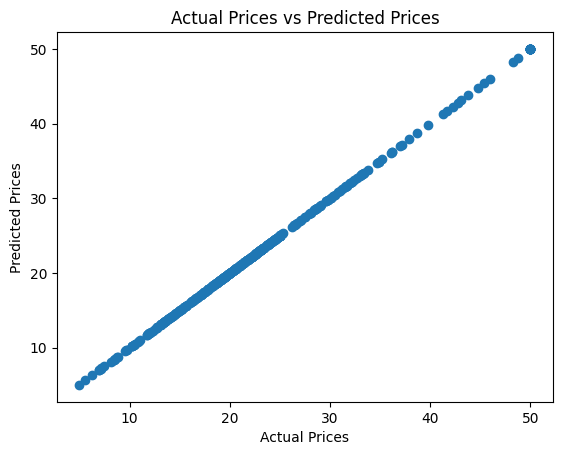

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

For test data

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
#R squared error
score_11=metrics.r2_score(Y_test,test_data_prediction)

#Mean absolute error
score_22=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error : ",score_11)
print('Mean absolute error : ',score_22)

R squared error :  0.9051721149855378
Mean absolute error :  2.0748727686264927


#Loan status prediction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn.preprocessing import LabelEncoder

Data collection and preprocessing

In [ ]:
loan_df=pd.read_csv('/content/drive/MyDrive/datasets/loan_dataset.csv')

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
loan_df.shape

(614, 13)

In [ ]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Here the missing values are less so we can drop those rows
loan_df=loan_df.dropna()

In [ ]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#label encoding
loan_df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
loan_df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
loan_df.replace(to_replace='3+',value=4,inplace=True)

In [ ]:
loan_df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data visualization

<Axes: xlabel='Education', ylabel='count'>

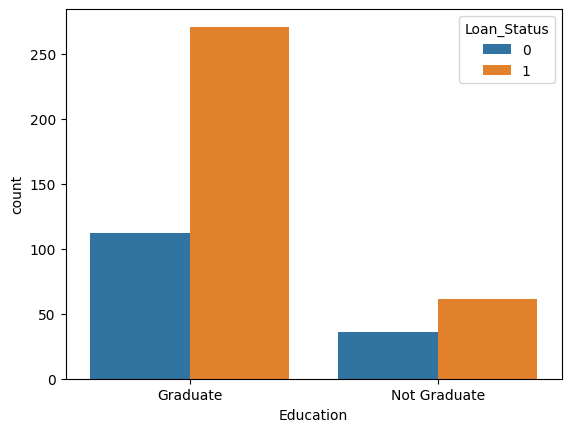

In [ ]:
#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_df)

<Axes: xlabel='Married', ylabel='count'>

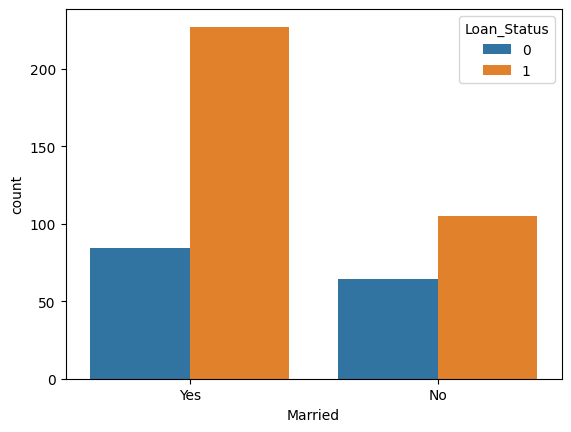

In [ ]:
#maritial status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_df)

<Axes: xlabel='Gender', ylabel='count'>

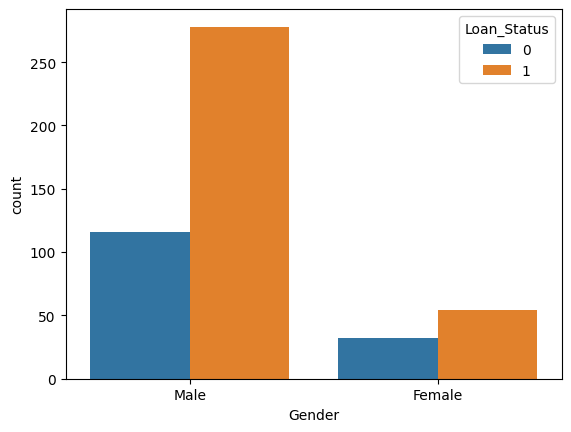

In [ ]:
#Gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_df)

In [ ]:
#convert categorial columns to numerical values
loan_df.replace({"Married":{'No':0,'Yes':1},"Gender":{'Male':1,'Female':0},"Education":{'Graduate':1,'Not Graduate':0},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
X=loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_df['Loan_Status']

In [ ]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

support vector machine

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model evaluation

In [ ]:
#accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('accuracy of testing data : ',training_data_accuracy)

accuracy of testing data :  0.7986111111111112


In [ ]:
#accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('accuracy of test data : ',test_data_accuracy)

accuracy of test data :  0.8333333333333334


Predictive system

In [ ]:
input_data=(1,1,1,1,0,3000,0.0,66.0,360.0,1.0,2)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0]==0 :
  print('Non Diabetic')
else :
  print('Diabetic')

[1]
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#Heart disease prediction using cross validation technique and gridSearchCV

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Data collection and preprocessing

In [ ]:
heart_df=pd.read_csv('/content/drive/MyDrive/datasets/heart_disease_data.csv')

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_df.shape

(303, 14)

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1--->Defective heart

0--->Good heart

Splitting the features and the target

In [ ]:
X=heart_df.drop(columns='target',axis=1)
Y=heart_df['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


**Train Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Comparing the performance of models

In [ ]:
#list of models
models=[LogisticRegression(max_iter=10000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

In [ ]:
def compare_models():

  for model in models:
    model.fit(X_train,Y_train)
    test_data_prediction=model.predict(X_test)
    accuracy_of_test_data=accuracy_score(Y_test,test_data_prediction)
    print(f'Accuracy of {model} : {accuracy_of_test_data}')
    # print('\n')

In [ ]:
compare_models()

Accuracy of LogisticRegression(max_iter=10000) : 0.7704918032786885
Accuracy of SVC(kernel='linear') : 0.7704918032786885
Accuracy of KNeighborsClassifier() : 0.6557377049180327
Accuracy of RandomForestClassifier(random_state=0) : 0.7868852459016393


In [ ]:
#Here we are using a dataset with less number of inputs. For this type of datasets it is better to use cross validation when compared to train test spli function

**Cross Validation**

In [ ]:
#list of models
models=[LogisticRegression(max_iter=10000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

In [ ]:
def cv_score():
  for model in models:
    score=cross_val_score(model,X,Y,cv=5)
    print(f'Cross validation score of {model} : {score}')
    model_accuracy=sum(score)/len(score)
    model_accuracy*=100
    model_accuracy=round(model_accuracy,2)
    print(f'Accuracy of {model} : {model_accuracy}')

In [ ]:
cv_score()

Cross validation score of LogisticRegression(max_iter=10000) : [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy of LogisticRegression(max_iter=10000) : 82.83
Cross validation score of SVC(kernel='linear') : [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy of SVC(kernel='linear') : 82.83
Cross validation score of KNeighborsClassifier() : [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy of KNeighborsClassifier() : 64.39
Cross validation score of RandomForestClassifier(random_state=0) : [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy of RandomForestClassifier(random_state=0) : 83.81


In [ ]:
#Now we will use hperparamers of these models to know which is better model for their respective paramets

In [ ]:
hyperparameters={
    'lr':{
        'C':[1,5,10,20]
    },
    'svc':{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[1,5,10,20]
    },
    'knc':{
        'n_neighbors':[3,5,10]
    },
    'rfc':{
        'n_estimators':[10,20,50,100]
    }
}


In [ ]:
type(hyperparameters)

dict

In [ ]:
print(hyperparameters.keys())

dict_keys(['lr', 'svc', 'knc', 'rfc'])


In [ ]:
model_list=list(hyperparameters.keys())

In [ ]:
print(model_list)

['lr', 'svc', 'knc', 'rfc']


In [ ]:
hyperparameters[model_list[1]]

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

Applying GridSearchCV

In [ ]:
def ModelSelection(list_of_models,hyperparameter_dict):

  result=[]

  i=0

  for model in list_of_models:

    key=model_list[i]

    params=hyperparameter_dict[key]

    i+=1

    print(model)
    print(params)

    classifier=GridSearchCV(model,params,cv=5)

    classifier.fit(X,Y)

    result.append({
        'model':model,
        'best_params':classifier.best_params_,
        'best_score':classifier.best_score_
    })

    result_df=pd.DataFrame(result,columns=['model','best_params','best_score'])
  return result_df


In [ ]:
ModelSelection(models,hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
SVC(kernel='linear')
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}


,model,best_params,best_score
0,LogisticRegression(max_iter=10000),{'C': 5},0.831585
1,SVC(kernel='linear'),"{'C': 1, 'kernel': 'linear'}",0.828306
2,KNeighborsClassifier(),{'n_neighbors': 5},0.643880
3,RandomForestClassifier(random_state=0),{'n_estimators': 100},0.838087


Random forest classifier with 100 n_estimator is giving highest accuracy

#**Big Mart Sales prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data collection and analysis

In [ ]:
mart_df=pd.read_csv('/content/drive/MyDrive/datasets/big_mart_data.csv')

In [ ]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
mart_df.shape

(8523, 12)

In [ ]:
mart_df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [ ]:
mart_df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
mart_df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features
- Item_Identifier  
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size                
- Outlet_Location_Type
- Outlet_Type   



In [ ]:
mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values

In [ ]:
#mean value of item_weight column
mart_df['Item_Weight'].mean()

12.857645184135976

In [ ]:
#filling missing values with mean in item_weight coloumn
mart_df['Item_Weight'].fillna(mart_df['Item_Weight'].mean(),inplace=True)

In [ ]:
#mode value of outlet_size column
mode_of_outlet_size=mart_df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values=mart_df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
mart_df.loc[missing_values,'Outlet_Size']=mart_df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [ ]:
mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [ ]:
sns.set()

<ipython-input-18-0e56389e9e4f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Weight'])


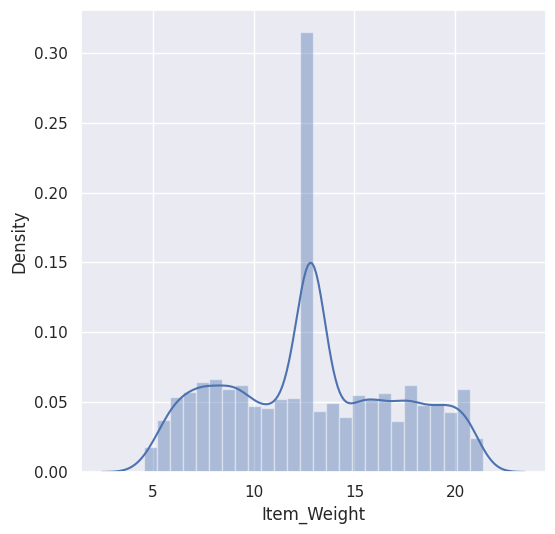

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_Weight'])
plt.show()

<ipython-input-19-4dd1e8d2cd2c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Visibility'])


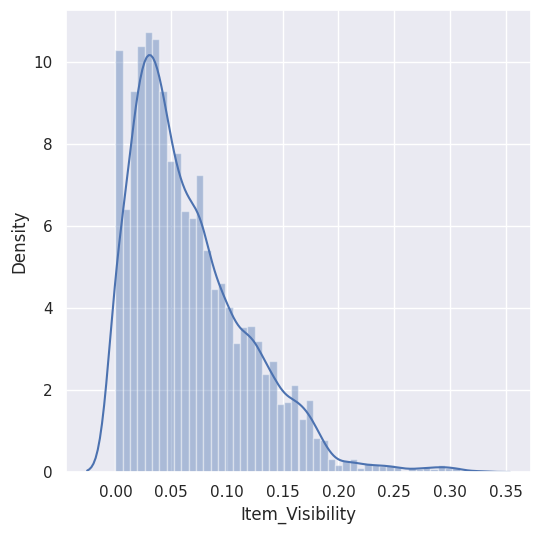

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_Visibility'])
plt.show()

<ipython-input-20-fb6134e910aa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_MRP'])


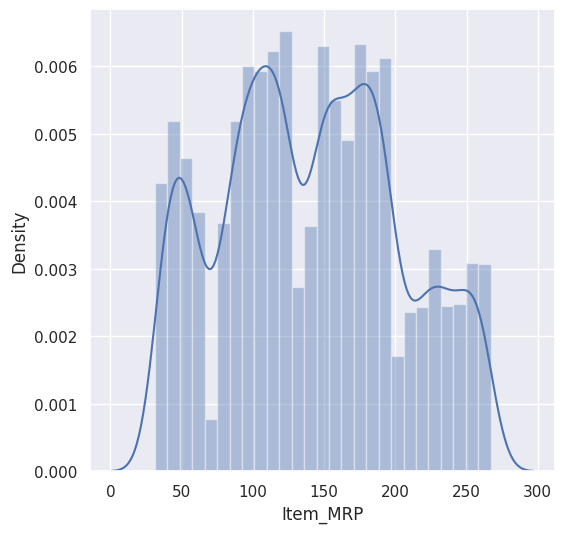

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_MRP'])
plt.show()

<ipython-input-21-87ca9eee30f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Outlet_Sales'])


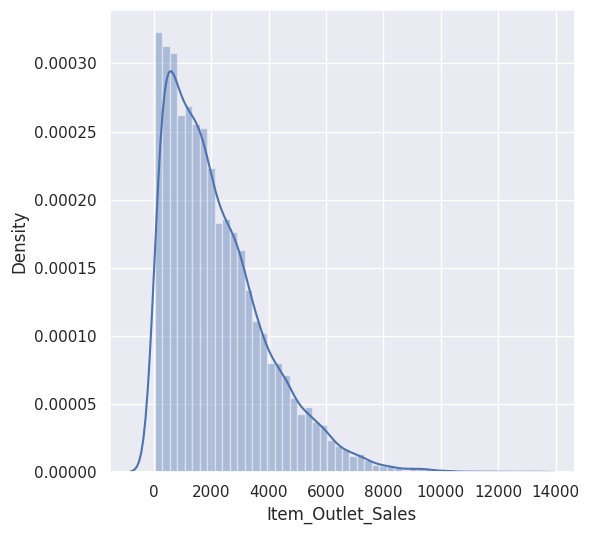

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(mart_df['Item_Outlet_Sales'])
plt.show()

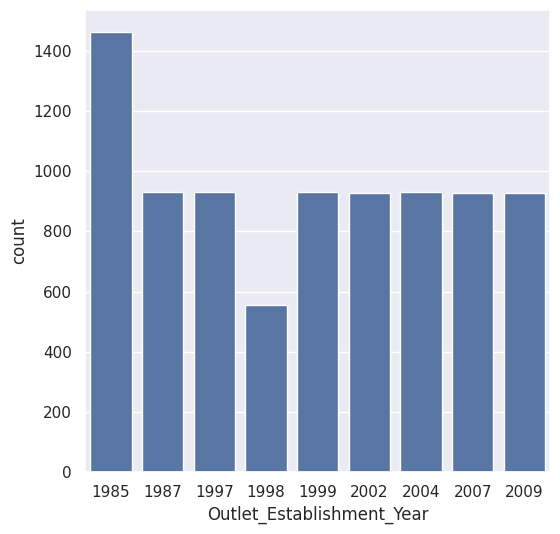

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=mart_df)
plt.show()

Categorical features

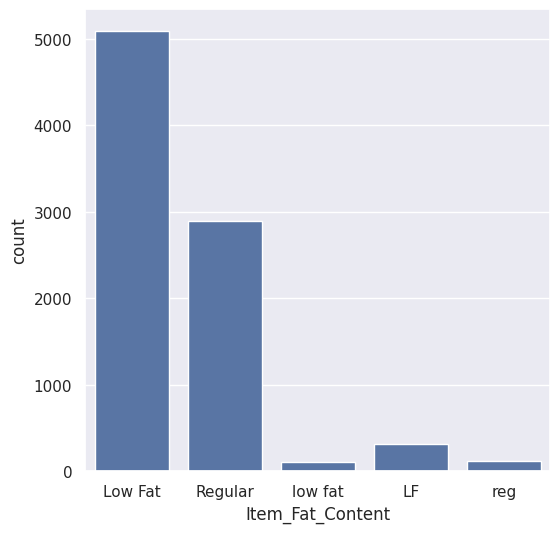

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=mart_df)
plt.show()

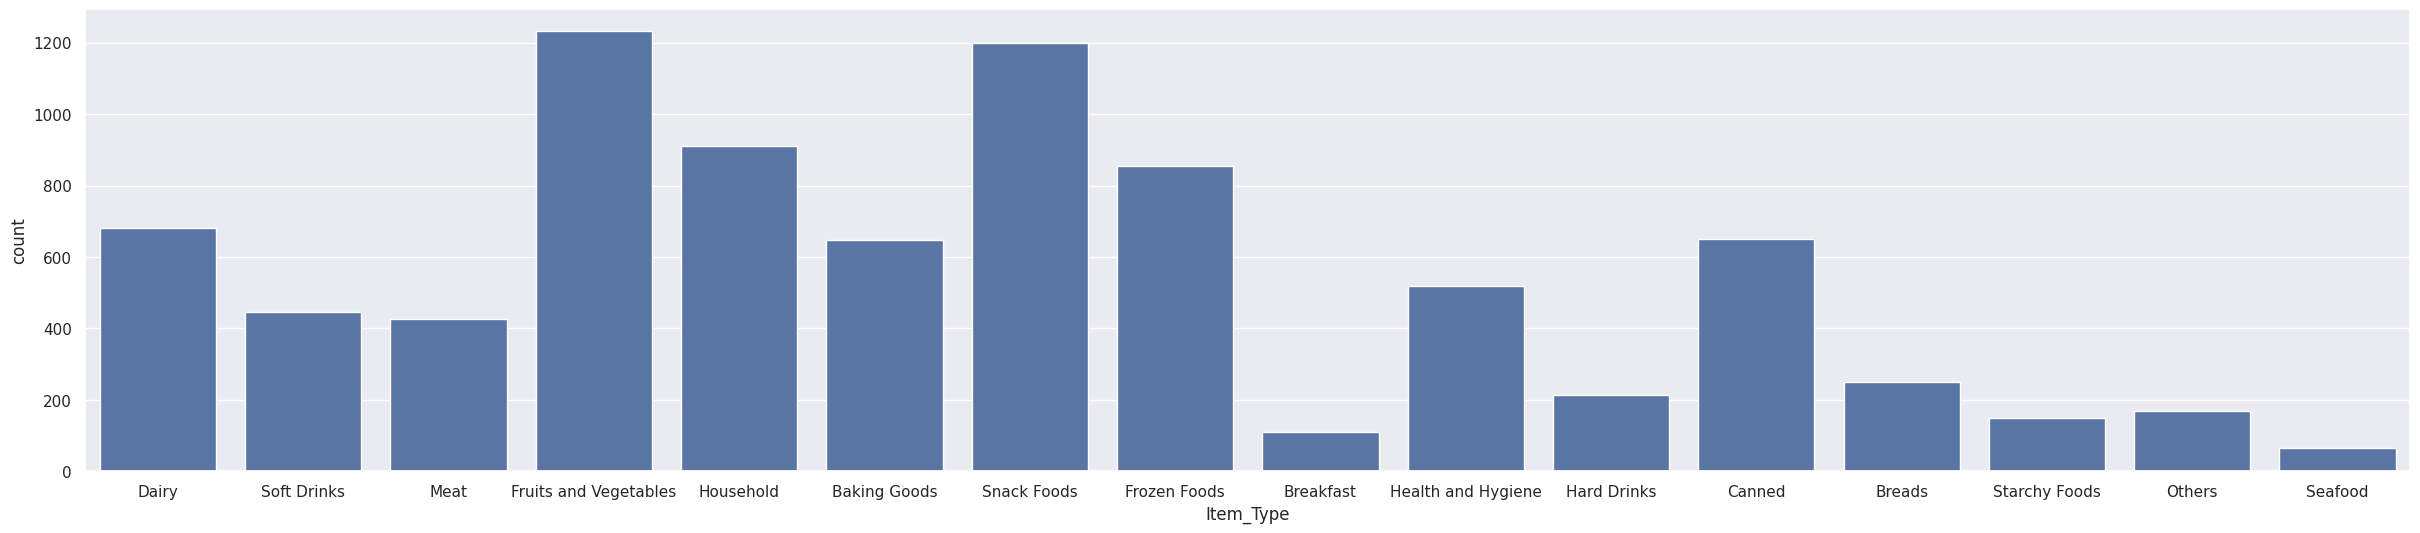

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=mart_df)
plt.show()

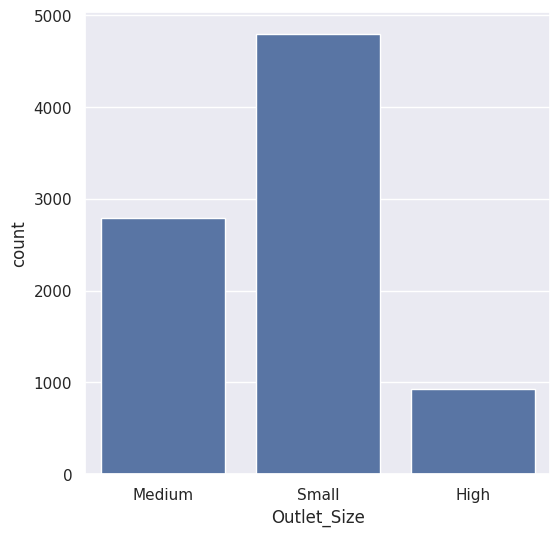

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=mart_df)
plt.show()

Data preprocessing

In [ ]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
mart_df.replace({'Item_Fat_Content':{'LF': 'Low Fat','reg' : 'Regular','low fat' : 'Low Fat'}},inplace=True)

In [ ]:
mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

Tranfering the categorical values into numerical values

In [ ]:
encode=LabelEncoder()

In [ ]:
#Item_Identifier
mart_df['Item_Identifier']=encode.fit_transform(mart_df['Item_Identifier'])
# Item_Fat_Content
mart_df['Item_Fat_Content']=encode.fit_transform(mart_df['Item_Fat_Content'])
# Item_Type
mart_df['Item_Type']=encode.fit_transform(mart_df['Item_Type'])
# Outlet_Identifier
mart_df['Outlet_Identifier']=encode.fit_transform(mart_df['Outlet_Identifier'])
# Outlet_Size
mart_df['Outlet_Size']=encode.fit_transform(mart_df['Outlet_Size'])
# Outlet_Location_Type
mart_df['Outlet_Location_Type']=encode.fit_transform(mart_df['Outlet_Location_Type'])
# Outlet_Type
mart_df['Outlet_Type']=encode.fit_transform(mart_df['Outlet_Type'])

In [ ]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and targets

In [ ]:
X=mart_df.drop(columns='Item_Outlet_Sales')
Y=mart_df['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(8523,) (6818,) (1705,)


ML model training

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [ ]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print('R squared value : ',r2_train)

R squared value :  0.8762174618111388


In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [ ]:
print('R squared value : ',r2_test)

R squared value :  0.5017253991620692


#**Breast cancer classification**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
cancer_data=sklearn.datasets.load_breast_cancer()

In [ ]:
print(cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
cancer_df=pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_df['label']=cancer_data.target

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
cancer_df.shape

(569, 31)

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
X=cancer_df.drop(columns='label',axis=1)
Y=cancer_df['label']

Standardizing the data

In [ ]:
scaler=StandardScaler()

In [ ]:
print(X.std())

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
print(standardized_data.std())

1.0


In [ ]:
X=standardized_data

Splitting into training and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


Training logistic regression model

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction_on_training_data=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Training data accuracy : ',training_data_accuracy)

Training data accuracy :  0.9428571428571428


In [ ]:
prediction_on_test_data=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Test data accuracy : ',test_data_accuracy)

Test data accuracy :  0.956140350877193


Building a predictive system

In [ ]:
input_array=(9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)
input_data_as_numpy_array=np.asarray(input_array)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# scaler.fit(input_data_reshaped)

# standardized_data1=scaler.transform(input_data_reshaped)

# print(standardized_data1.std())
print(input_data_reshaped.std())

prediction=model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
  print('The tumor is malignant')
else:
  print('The tumor is benign')

73.60159387847419
[1]
The tumor is benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#Calorie burnt prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
calorie_df=pd.read_csv('/content/drive/MyDrive/datasets/calories.csv')

In [ ]:
calorie_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_df=pd.read_csv('/content/drive/MyDrive/datasets/exercise.csv')

In [ ]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
df=pd.concat([exercise_df,calorie_df['Calories'],],axis=1)

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
df.shape

(15000, 9)

In [ ]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#here gender is categorical column other than these are ok for ML
df.replace({'Gender':{'male':1,'female':0}},inplace=True)

Data Analysis

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

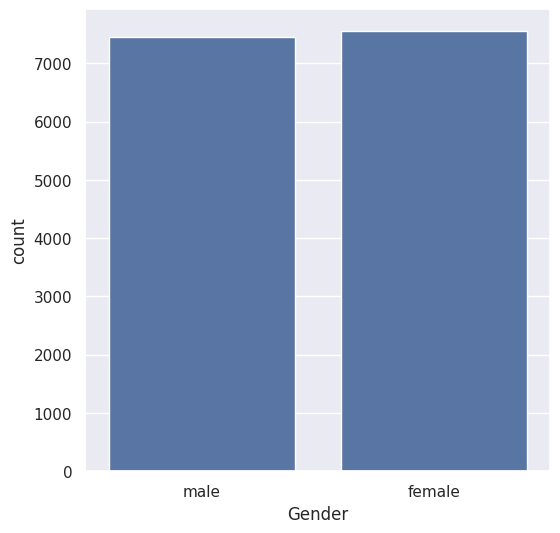

In [ ]:
#plotting gender column in count plot
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=df)
plt.show()

In [ ]:
#finding the distribution of age columc
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.show()

TypeError: distplot() got an unexpected keyword argument 'data'

<Figure size 600x600 with 0 Axes>

<ipython-input-30-e67ebcce2b1d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


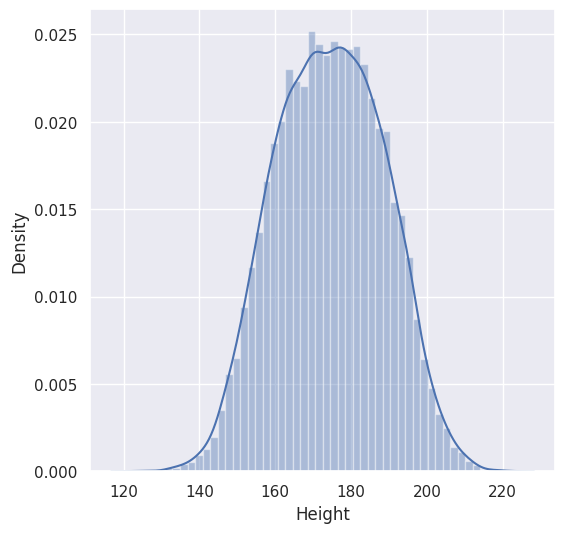

In [ ]:
#finding the distribution of height column
plt.figure(figsize=(6,6))
sns.distplot(df['Height'])
plt.show()

<Figure size 600x600 with 0 Axes>

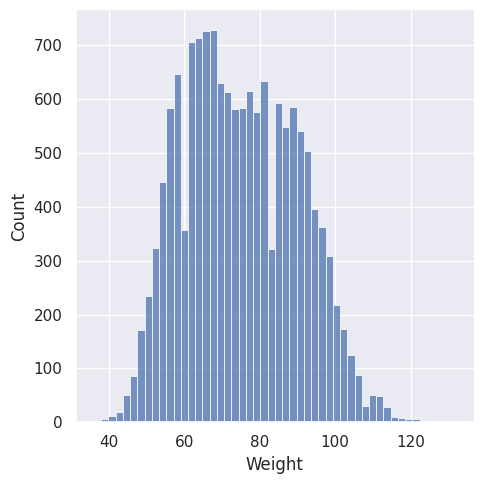

In [ ]:
#finding the distribution of weight column
plt.figure(figsize=(6,6))
sns.displot(df['Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

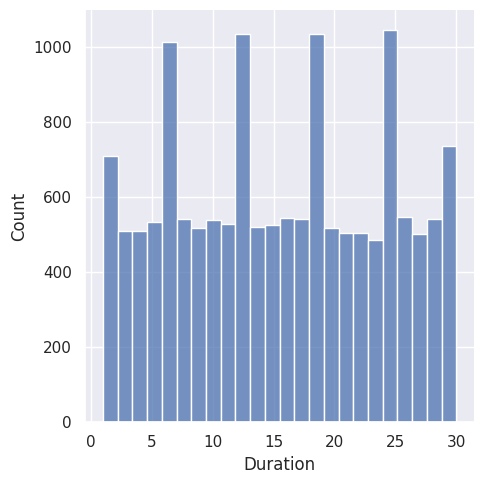

In [ ]:
#finding the distribution of Duration column
plt.figure(figsize=(6,6))
sns.displot(df['Duration'])
plt.show()

Finding the coorelation

In [ ]:
correlation=df.corr()

<Axes: >

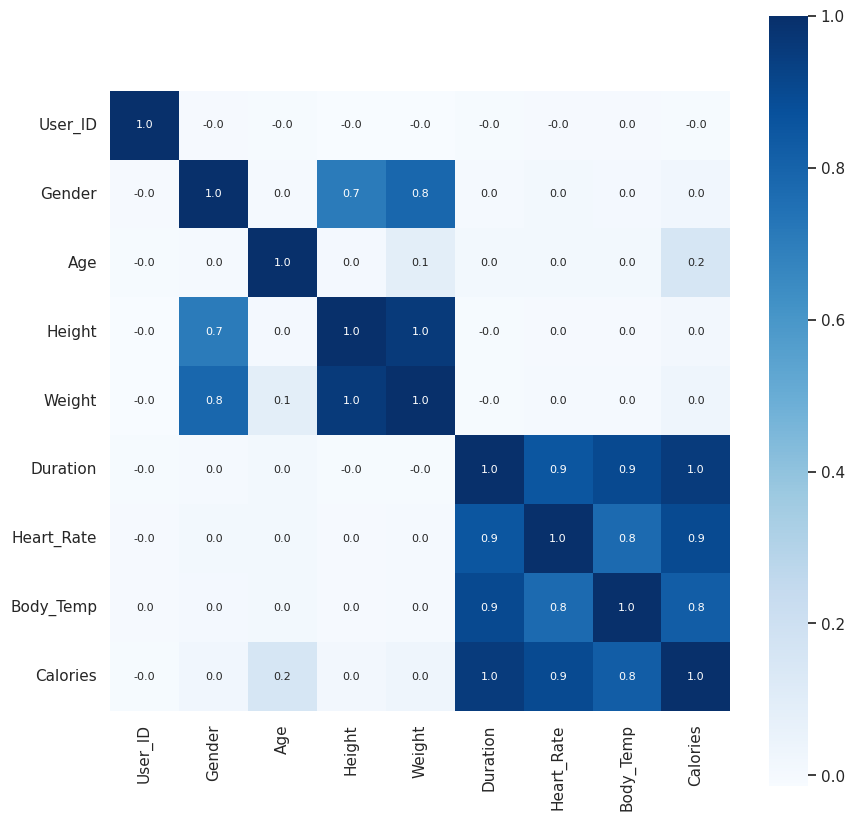

In [ ]:
#construction of heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting data into features and target

In [ ]:
X=df.drop(columns=['User_ID','Calories'],axis=1)
Y=df['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting into train and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=df['Gender'])

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


**Model training**

XGBosst Regressor

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Training data

In [ ]:
training_data_prediction=model.predict(X_train)
r2_train=metrics.r2_score(Y_train,training_data_prediction)
mean_train=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('Mean absolute error for training data: ',mean_train)
print('R square score for training data: ',r2_train)

Mean absolute error for training data:  0.9492212838158012
R square score for training data:  0.9995718739110304


Test data

In [ ]:
test_data_prediction=model.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_data_prediction)
mean_test=metrics.mean_absolute_error(Y_test,test_data_prediction)
print('Mean absolute error for test data: ',mean_test)
print('R square score for test data: ',r2_test)

Mean absolute error for test data:  1.4682553369204203
R square score for test data:  0.9988476157019467


#**Movie Recommendation System**

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Preprocessing

In [ ]:
movie_df=pd.read_csv(r'/content/drive/MyDrive/datasets/movies.csv')

In [ ]:
movie_df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
movie_df.shape

(4803, 24)

In [ ]:
#selecting relavent features for recommendations

selected_features=['genres','keywords','overview','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'overview', 'tagline', 'cast', 'director']


In [ ]:
#replacing the null values with null string

for feature in selected_features:
  movie_df[feature]=movie_df[feature].fillna('')

In [ ]:
#combining all the selected features

combined_features=movie_df['genres']+' '+movie_df['keywords']+' '+movie_df['overview']+' '+movie_df['tagline']+' '+movie_df['cast']+' '+movie_df['director']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      When ambitious New York attorney Sam is sent...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
#converting the text data into feature vectors
vectorizer=TfidfVectorizer()

In [ ]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 4288)	0.13213124585063996
  (0, 14180)	0.08418056281586364
  (0, 23134)	0.1498786462809525
  (0, 17784)	0.12285843797047787
  (0, 15569)	0.171366691592621
  (0, 25868)	0.11590870590502833
  (0, 29614)	0.15064979633862852
  (0, 24802)	0.158925784923944
  (0, 23578)	0.16802034155542864
  (0, 30543)	0.15064979633862852
  (0, 30145)	0.18243919685121024
  (0, 23619)	0.11047375838269538
  (0, 19410)	0.0318696249813729
  (0, 30121)	0.07272849549697494
  (0, 9065)	0.14505772980982928
  (0, 5245)	0.16506865163441015
  (0, 1014)	0.12285843797047787
  (0, 1243)	0.05270709034262741
  (0, 21523)	0.1665010643166998
  (0, 1281)	0.03195190270050669
  (0, 19650)	0.1612055740237117
  (0, 10368)	0.13848277654301597
  (0, 2974)	0.09974129089792806
  (0, 27515)	0.14569220419090678
  (0, 2685)	0.09805341831299116
  :	:
  (4802, 27153)	0.05940079357098276
  (4802, 19243)	0.061349419053434766
  (4802, 11941)	0.07829183421073846
  (4802, 29680)	0.07735547381237222
  (4802, 9346)	0.07104321122746965
  (48

Cosine Similrity

In [ ]:
#getting similarity scores using cosine similarity

similarity=cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.05083168 0.0332947  ... 0.02749812 0.0304889  0.0072518 ]
 [0.05083168 1.         0.04356836 ... 0.05077045 0.03100979 0.01521198]
 [0.0332947  0.04356836 1.         ... 0.02646984 0.04751623 0.01372603]
 ...
 [0.02749812 0.05077045 0.02646984 ... 1.         0.03481447 0.03546821]
 [0.0304889  0.03100979 0.04751623 ... 0.03481447 1.         0.03098945]
 [0.0072518  0.01521198 0.01372603 ... 0.03546821 0.03098945 1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


In [ ]:
# getting input from user
movie_name=input('Enter your favouite movie name : ')

Enter your favouite movie name : iron man


In [ ]:
#creating a list with all the movie names give in dataset

list_of_movie_names=movie_df['title'].tolist()
print(list_of_movie_names)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name given by the user

find_close_match=difflib.get_close_matches(movie_name,list_of_movie_names)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match=find_close_match[0]
print(close_match)

Iron Man


In [ ]:
#finding the index of the movie with title

index_of_movie=movie_df[movie_df.title==close_match]['index'].values[0]
print(index_of_movie)

68


In [ ]:
#getting a list of simlar movies

similarity_score=list(enumerate(similarity[index_of_movie]))
print(similarity_score)

[(0, 0.05017469339266746), (1, 0.03650601760111055), (2, 0.011028940457748972), (3, 0.006566052540268534), (4, 0.026260064582796727), (5, 0.014352343583526092), (6, 0.03283993264677229), (7, 0.19343464286690049), (8, 0.010447641591762173), (9, 0.03661745849142617), (10, 0.03856206332307925), (11, 0.013140335946520334), (12, 0.010480204139154865), (13, 0.010519252119405034), (14, 0.058240542855474524), (15, 0.028506070177881645), (16, 0.13208839109747222), (17, 0.015783602134002372), (18, 0.02078306728232427), (19, 0.042486448120754944), (20, 0.036752005155219786), (21, 0.024462379417016164), (22, 0.009211246725242383), (23, 0.017688499354673565), (24, 0.017920651785080486), (25, 0.003516675934857519), (26, 0.11563787911286948), (27, 0.03304503555209013), (28, 0.03726807159069121), (29, 0.00955791287735387), (30, 0.0796908302150445), (31, 0.29052114405111434), (32, 0.02575250044213904), (33, 0.07770036840942475), (34, 0.005794060102999554), (35, 0.020964205751412706), (36, 0.02530402286

In [ ]:
# sorting the movies based on similarity score

sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
print(sorted_similar_movies)

[(68, 1.0000000000000002), (79, 0.32928784708836273), (31, 0.29052114405111434), (7, 0.19343464286690049), (16, 0.13208839109747222), (511, 0.11735356375367764), (4401, 0.11644899793001537), (26, 0.11563787911286948), (64, 0.11260372706734421), (182, 0.10817936918053872), (3623, 0.1042757991040167), (94, 0.10008582067970911), (46, 0.08808497545952933), (4033, 0.08653671400103878), (783, 0.08640309672854925), (174, 0.08596763747178217), (618, 0.08422372953874689), (85, 0.08317925570431418), (3133, 0.0800340820705973), (101, 0.07997032837045652), (1740, 0.07985500618953217), (30, 0.0796908302150445), (3466, 0.07863852678986306), (33, 0.07770036840942475), (203, 0.07717739012595404), (1177, 0.07676994814946043), (420, 0.07660248386797325), (131, 0.07526258364935165), (1406, 0.07520922477471761), (318, 0.07470160419701297), (788, 0.07388756055635985), (2229, 0.07375196657625921), (122, 0.07319454323849187), (1135, 0.07304073502421526), (2235, 0.0724818728915707), (138, 0.07246371735320549)

In [ ]:
#print the similar movies based on the index

print('Movies suggested for you : \n')

i=1

for movie in sorted_similar_movies:
  index=movie[0]
  title_from_index=movie_df[movie_df.index==index]['title'].values[0]
  if(i<21):
    print(i,'.',title_from_index)
    i+=1


Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . X-Men
7 . The Helix... Loaded
8 . Captain America: Civil War
9 . X-Men: Apocalypse
10 . Ant-Man
11 . Made
12 . Guardians of the Galaxy
13 . X-Men: Days of Future Past
14 . Super
15 . Mortdecai
16 . The Incredible Hulk
17 . Mystery Men
18 . Captain America: The Winter Soldier
19 . The Devil's Tomb
20 . X-Men: First Class


Movie Recommendation System

In [ ]:
movie_name=input('Enter your favouite movie name : ')

list_of_movie_names=movie_df['title'].tolist()

find_close_match=difflib.get_close_matches(movie_name,list_of_movie_names)

close_match=find_close_match[0]

index_of_movie=movie_df[movie_df.title==close_match]['index'].values[0]

similarity_score=list(enumerate(similarity[index_of_movie]))

sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)

print('Movies suggested for you : \n')

i=1

for movie in sorted_similar_movies:
  index=movie[0]
  title_from_index=movie_df[movie_df.index==index]['title'].values[0]
  if(i<21):
    print(i,'.',title_from_index)
    i+=1

Enter your favouite movie name : alladin
Movies suggested for you : 

1 . Aladdin
2 . The Princess and the Frog
3 . Enchanted
4 . The Princess Diaries
5 . Frozen
6 . The Promise
7 . 13 Going on 30
8 . Shanghai Noon
9 . The Princess Diaries 2: Royal Engagement
10 . Mirror Mirror
11 . The Legend of Hercules
12 . Princess Kaiulani
13 . Conan the Destroyer
14 . Mrs. Winterbourne
15 . Delgo
16 . The Greatest
17 . Down Terrace
18 . Coal Miner's Daughter
19 . Mrs. Doubtfire
20 . Come Early Morning


#Customer Segmentation using K-Means clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
customer_df=pd.read_csv('/content/drive/MyDrive/datasets/Mall_Customers.csv')

In [ ]:
customer_df.shape

(200, 5)

In [ ]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing annual income column and spending score column

In [ ]:
X=customer_df.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the no of clusters

WCSS - With in clusters sum of squares

In [ ]:
#Finding wcss value for different number of clusters

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

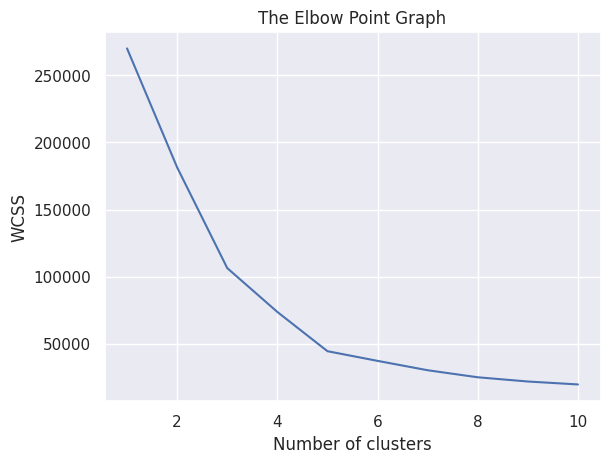

In [ ]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum no of clusters = 5

Training the k-means clustering

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label based on each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing all the clusters

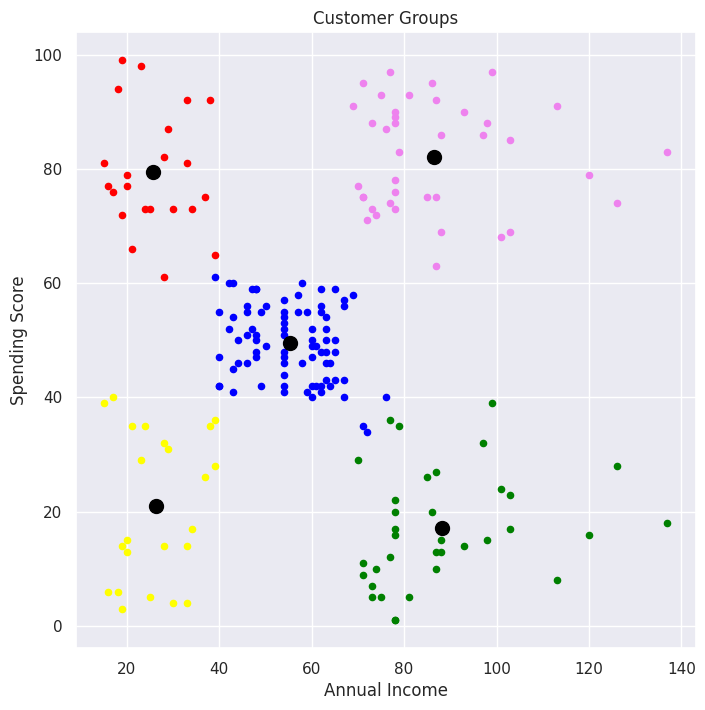

In [ ]:
#plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=20,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=20,c='blue',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=20,c='violet',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=20,c='red',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=20,c='yellow',label='Cluster 5')

#showing centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()